# Guia 3

## Ejercicio 1

Obtener los siguientes valores de una señal **senoidal**, una **rampa**, una **onda cuadrada** y una señal **aleatoria**:
1. valor medio,
2. máximo,
3. mínimo,
4. amplitud,
5. energía,
6. acción,
7. potencia media,
8. raíz del valor cuadrático medio,

### Solución

1. valor medio $\Rightarrow \frac{1}{N}\sum_{k=1}^{N}x_k = \frac{1}{N}||x||_{1}$
2. máximo $\Rightarrow ||x||_{\infty}$
3. mínimo
4. amplitud $\Rightarrow ||x||_{\infty}$
5. energía $\Rightarrow ||x||_{2}^{2}$
6. acción $\Rightarrow ||x||_{1}$
7. potencia media $\Rightarrow P(x)=\frac{1}{N}||x||_{2}^{2}$
8. raíz del valor cuadrático medio $\Rightarrow RMS(x)=\sqrt{P(x)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def norma(x,p):
    """devuelve la norma p de la senial x

    Args:
        x: senial
        p: tipo de norma, 'inf' para norma infinito

    Returns:
        max(x) para p='inf'. Si no, la raiz p de la suma de las potencias p de los valor de x
    """
    if(p == 'inf'):
        return max(x)
    
    return np.power(np.sum(np.power(x,[p]*len(x))),1/p)

def valorMedio(x):
    return norma(x,1)/len(x)

def maximo(x):
    return norma(x,'inf')

def amplitud(x):
    return norma(x,'inf')

def energia(x):
    return np.power(norma(x,2),2)

def accion(x):
    return norma(x,1)

def potencia(x):
    return energia(x)/len(x)

def RMS(x):
    return np.sqrt(potencia(x))

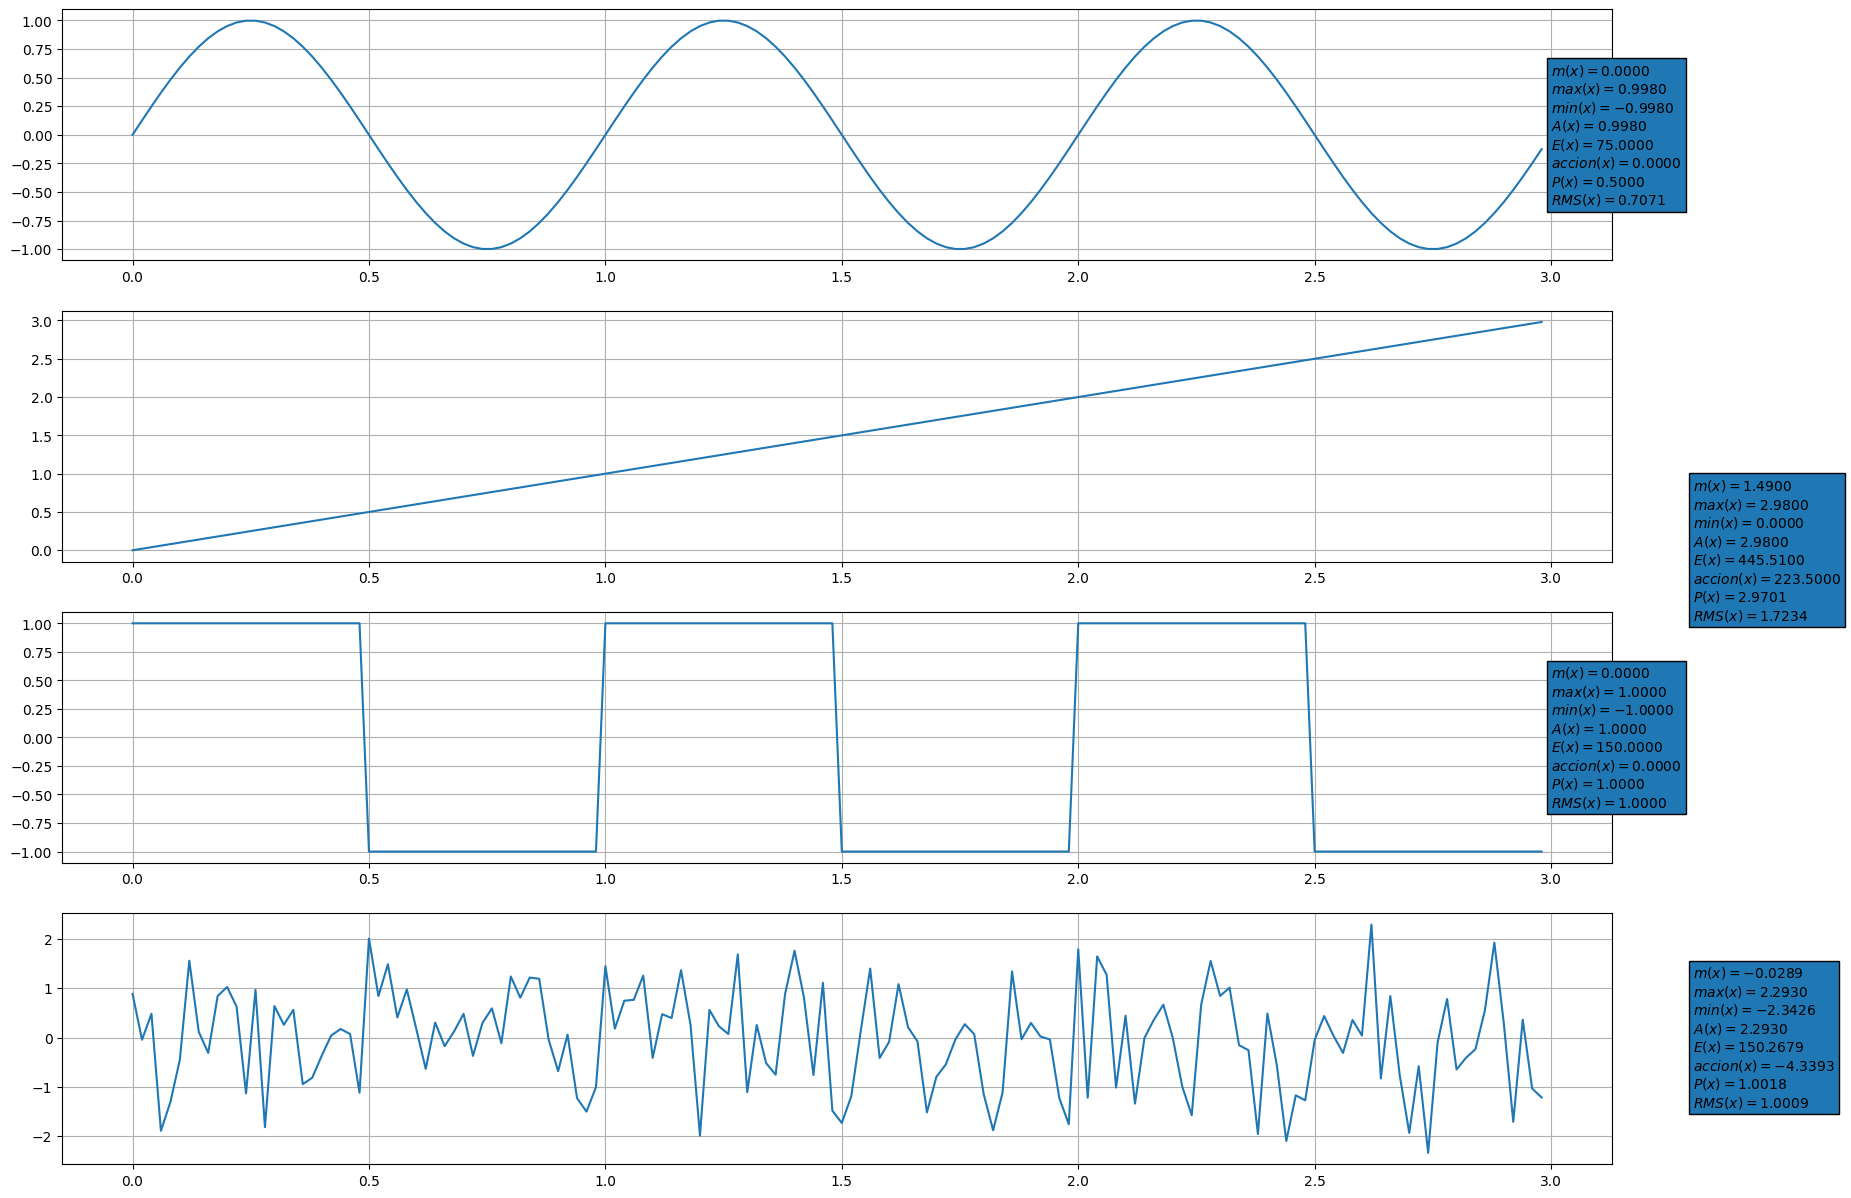

In [2]:
def senoidal(Tini,Tfin,fm):
    """Senial senoidal te frecuencia 1Hz, fase 0 y amplitud 1"""
    t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)),endpoint=False)
    aux = 2*np.pi
    return t, np.sin(aux*t)

def rampa(Tini,Tfin,fm):
    """Senial rampa de pendiente 1"""
    t = np.linspace(Tini,Tfin,int(fm*(Tfin-Tini)),endpoint=False)
    return t, t

def cuadrada(tini, tfin, fm):
    """Senial cuadrada de frecuencia 1 y amplitud 1"""
    # muestras
    t = np.linspace(tini, tfin, fm * (tfin-tini), endpoint=False)
    # precalcular modulos 2 * np.pi * t%(2pi)
    val = np.mod(2 * np.pi * t, 2 * np.pi)
    # retornar valores condicionados mod >= pi -> -1 
    return t, np.where(np.greater_equal(val, np.pi), -1, 1)

def aleatoria(tini,tfin,fm):
    t = np.linspace(tini,tfin,int(fm*(tfin-tini)), endpoint=False)
    return t, np.random.normal(0,1,len(t))

def props(x):
    """ Texto con valores asociados a la senial x, redondeados a 4 decimales"""
    txt = ""
    txt += "$m(x) = %.4f$\n"      % valorMedio(x)
    txt += "$max(x) = %.4f$\n"    % maximo(x)
    txt += "$min(x) = %.4f$\n"    % min(x)
    txt += "$A(x) = %.4f$\n"      % amplitud(x)
    txt += "$E(x) = %.4f$\n"      % energia(x)
    txt += "$accion(x) = %.4f$\n" % accion(x)
    txt += "$P(x) = %.4f$\n"      % potencia(x)
    txt += "$RMS(x) = %.4f$"      % RMS(x)
    return txt

# ================= MAIN ================= #
Tini = 0
Tfin = 3
fm = 50

# Crear seniales
s = [[0] for _ in range(4)]
t,s[0] = senoidal(Tini,Tfin,fm)     # senoidal
t,s[1] = rampa(Tini,Tfin,fm)        # rampa
t,s[2] = cuadrada(Tini,Tfin,fm)     # cuadrada
t,s[3] = aleatoria(Tini,Tfin,fm)    # aleatoria


fig,ax = plt.subplots(4,1)
fig.set_figwidth(20)
fig.set_figheight(15)

for i in range(4):
    ax[i].grid()
    ax[i].text(3+0.3*(i%2),0, props(s[i]), fontsize=10, va='center',
            bbox=dict(boxstyle='square'))
    ax[i].plot(t,s[i])
plt.show()